In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances
from sklearn.linear_model import LinearRegression
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('telcom_data (2).xlsx - Sheet1 (1).csv')
print(df.head())

      Bearer Id          Start  Start ms            End  End ms  Dur. (ms)  \
0  1.311450e+19   4/4/19 12:01     770.0  4/25/19 14:35   662.0  1823652.0   
1  1.311450e+19   4/9/19 13:04     235.0   4/25/19 8:15   606.0  1365104.0   
2  1.311450e+19   4/9/19 17:42       1.0  4/25/19 11:58   652.0  1361762.0   
3  1.311450e+19   4/10/19 0:31     486.0   4/25/19 7:36   171.0  1321509.0   
4  1.311450e+19  4/12/19 20:10     565.0  4/25/19 10:40   954.0  1089009.0   

           IMSI  MSISDN/Number          IMEI Last Location Name  ...  \
0  2.082014e+14   3.366496e+10  3.552121e+13        9.16457E+15  ...   
1  2.082019e+14   3.368185e+10  3.579401e+13            L77566A  ...   
2  2.082003e+14   3.376063e+10  3.528151e+13            D42335A  ...   
3  2.082014e+14   3.375034e+10  3.535661e+13            T21824A  ...   
4  2.082014e+14   3.369980e+10  3.540701e+13            D88865A  ...   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0          15854611.0           2

In [8]:
print(df.head())
print(df.info())
print(df.describe())

      Bearer Id          Start  Start ms            End  End ms  Dur. (ms)  \
0  1.311450e+19   4/4/19 12:01     770.0  4/25/19 14:35   662.0  1823652.0   
1  1.311450e+19   4/9/19 13:04     235.0   4/25/19 8:15   606.0  1365104.0   
2  1.311450e+19   4/9/19 17:42       1.0  4/25/19 11:58   652.0  1361762.0   
3  1.311450e+19   4/10/19 0:31     486.0   4/25/19 7:36   171.0  1321509.0   
4  1.311450e+19  4/12/19 20:10     565.0  4/25/19 10:40   954.0  1089009.0   

           IMSI  MSISDN/Number          IMEI Last Location Name  ...  \
0  2.082014e+14   3.366496e+10  3.552121e+13        9.16457E+15  ...   
1  2.082019e+14   3.368185e+10  3.579401e+13            L77566A  ...   
2  2.082003e+14   3.376063e+10  3.528151e+13            D42335A  ...   
3  2.082014e+14   3.375034e+10  3.535661e+13            T21824A  ...   
4  2.082014e+14   3.369980e+10  3.540701e+13            D88865A  ...   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0          15854611.0           2

In [22]:
print(df.isnull().sum())

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [23]:
top_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:")
print(top_handsets)

Top 10 Handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [24]:
df['Manufacturer'] = df['Handset Type'].apply(lambda x: x.split()[0] if pd.notnull(x) else None)
top_manufacturers = df['Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:")
print(top_manufacturers)

Top 3 Handset Manufacturers:
Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [25]:
top_manufacturers_list = top_manufacturers.index.tolist()
for manufacturer in top_manufacturers_list:
    top_handsets_per_manufacturer = df[df['Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"Top 5 Handsets for {manufacturer}:")
    print(top_handsets_per_manufacturer)

Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [27]:
def user_overview_analysis(df):
    # Top 10 handsets
    top_handsets = df['Handset Type'].value_counts().head(10)
    
    # Top 3 manufacturers
    df['Manufacturer'] = df['Handset Type'].apply(lambda x: x.split()[0] if pd.notnull(x) else None)
    top_manufacturers = df['Manufacturer'].value_counts().head(3)
    
    # Top 5 handsets per top manufacturer
    top_manufacturers_list = top_manufacturers.index.tolist()
    handsets_per_manufacturer = {}
    for manufacturer in top_manufacturers_list:
        top_handsets = df[df['Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
        handsets_per_manufacturer[manufacturer] = top_handsets
    
    return top_handsets, top_manufacturers, handsets_per_manufacturer


In [14]:
top_handsets, top_manufacturers, handsets_per_manufacturer = user_overview_analysis(df)
print("Top 10 Handsets:\n", top_handsets)
print("Top 3 Manufacturers:\n", top_manufacturers)
for manufacturer, handsets in handsets_per_manufacturer.items():
    print(f"Top Handsets for {manufacturer}:\n", handsets)

Top 10 Handsets:
 Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64
Top 3 Manufacturers:
 Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64
Top Handsets for Apple:
 Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Top Handsets for Samsung:
 Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Top Handsets for Huawei:
 Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     20

In [28]:
import pandas as pd
import numpy as np

In [29]:
user_behavior = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',   # Session duration
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',  # Assuming column exists
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',  # Assuming column exists
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',  # Assuming column exists
    'Email UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

In [30]:
applications = ['Youtube', 'Netflix', 'Gaming', 'Social Media', 'Google', 'Email', 'Other']
for app in applications:
    user_behavior[f'{app} Total (Bytes)'] = user_behavior[f'{app} DL (Bytes)'] + user_behavior[f'{app} UL (Bytes)']

user_behavior['Total Data (Bytes)'] = user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)']

In [18]:
print(user_behavior.describe())


       MSISDN/Number      Bearer Id     Dur. (ms)  Total DL (Bytes)  \
count   1.068560e+05  106856.000000  1.068560e+05      1.068560e+05   
mean    4.511474e+10       1.389777  1.461672e+05      6.336527e+08   
std     2.889423e+12       0.809863  1.863587e+05      4.645551e+08   
min     3.360100e+10       0.000000  7.142000e+03      8.827082e+06   
25%     3.365088e+10       1.000000  7.130800e+04      3.148271e+08   
50%     3.366365e+10       1.000000  1.027400e+05      5.703677e+08   
75%     3.368344e+10       2.000000  1.727990e+05      8.073645e+08   
max     8.823971e+14      18.000000  1.855375e+07      8.156743e+09   

       Total UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
count      1.068560e+05        1.068560e+05        1.068560e+05   
mean       5.730942e+07        1.621461e+07        1.534379e+07   
std        3.565765e+07        1.232294e+07        1.159870e+07   
min        2.866892e+06        5.300000e+01        1.060000e+02   
25%        3.639547e+07  

In [31]:
dispersion_metrics = user_behavior.describe().loc[['std', 'mean', 'min', 'max']]
print(dispersion_metrics)

      MSISDN/Number  Bearer Id     Dur. (ms)  Total DL (Bytes)  \
std    2.889423e+12   0.809863  1.863587e+05      4.645551e+08   
mean   4.511474e+10   1.389777  1.461672e+05      6.336527e+08   
min    3.360100e+10   0.000000  7.142000e+03      8.827082e+06   
max    8.823971e+14  18.000000  1.855375e+07      8.156743e+09   

      Total UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
std       3.565765e+07        1.232294e+07        1.159870e+07   
mean      5.730942e+07        1.621461e+07        1.534379e+07   
min       2.866892e+06        5.300000e+01        1.060000e+02   
max       7.295774e+08        2.378830e+08        2.150757e+08   

      Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  ...  \
std         1.231717e+07        1.161060e+07       4.440290e+08  ...   
mean        1.620639e+07        1.533194e+07       5.882158e+08  ...   
min         4.200000e+01        3.500000e+01       2.516000e+03  ...   
max         1.994792e+08        2.032419e+08      

In [32]:
import pandas as pd

In [ ]:
df.to_csv('output.csv', index=False)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

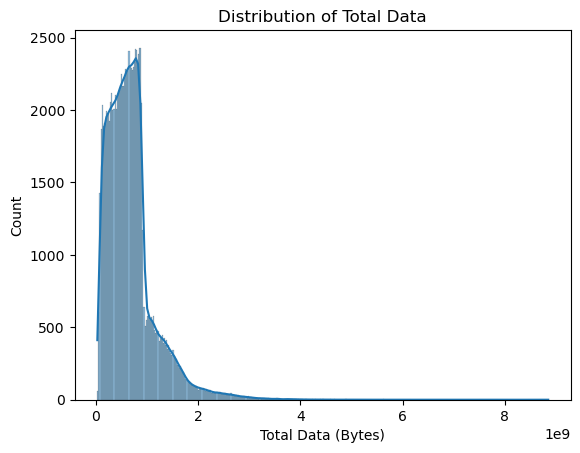

In [34]:
sns.histplot(user_behavior['Total Data (Bytes)'], kde=True)
plt.title('Distribution of Total Data')
plt.show()

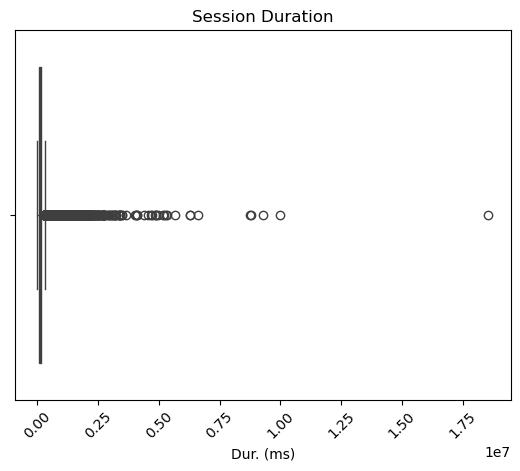

In [35]:
sns.boxplot(x=user_behavior['Dur. (ms)'])
plt.title('Session Duration')
plt.xticks(rotation=45)
plt.show()

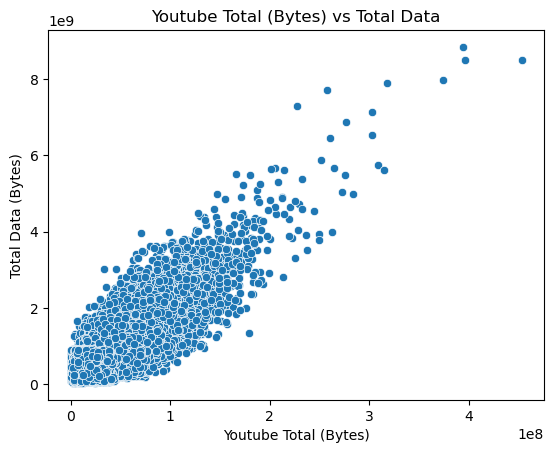

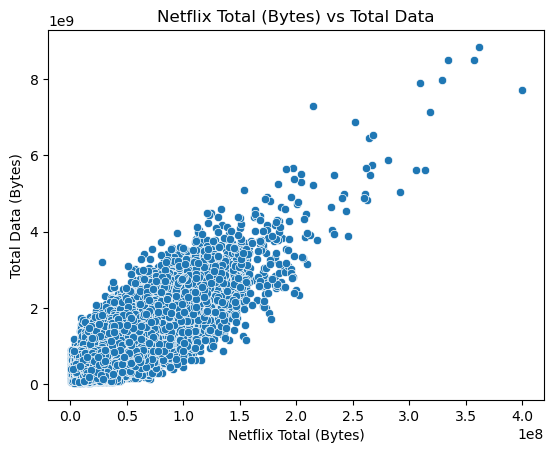

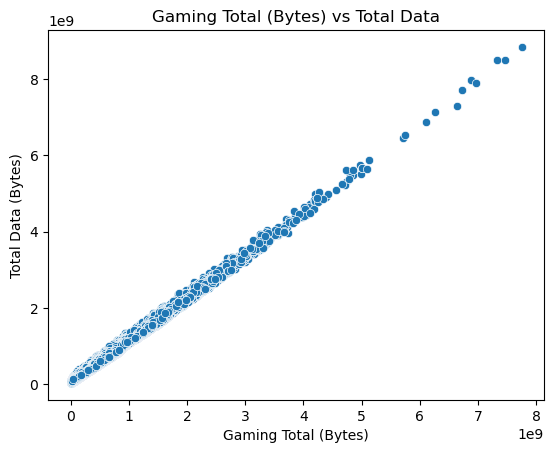

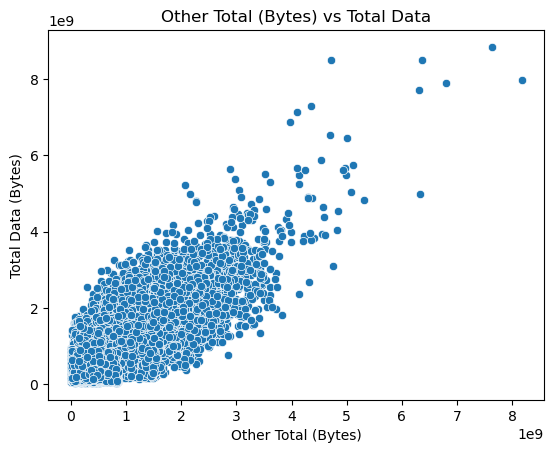

In [36]:
applications = ['Youtube Total (Bytes)', 'Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Total (Bytes)']
for app in applications:
    plt.figure()
    sns.scatterplot(x=user_behavior[app], y=user_behavior['Total Data (Bytes)'])
    plt.title(f'{app} vs Total Data')
    plt.show()

In [37]:
user_behavior['Total Duration Rank'] = pd.qcut(user_behavior['Dur. (ms)'], 10, labels=False)
decile_data = user_behavior.groupby('Total Duration Rank')['Total Data (Bytes)'].sum()
print(decile_data)

Total Duration Rank
0    5.439277e+12
1    6.109410e+12
2    6.536402e+12
3    6.034241e+12
4    5.143732e+12
5    6.426251e+12
6    6.152478e+12
7    7.822234e+12
8    9.305495e+12
9    1.486393e+13
Name: Total Data (Bytes), dtype: float64


                            Social Media Total (Bytes)  Google Total (Bytes)  \
Social Media Total (Bytes)                    1.000000              0.643071   
Google Total (Bytes)                          0.643071              1.000000   
Email Total (Bytes)                           0.634016              0.688460   
Youtube Total (Bytes)                         0.659545              0.718539   
Netflix Total (Bytes)                         0.659974              0.716191   
Gaming Total (Bytes)                          0.590048              0.642037   
Other Total (Bytes)                           0.591727              0.642608   

                            Email Total (Bytes)  Youtube Total (Bytes)  \
Social Media Total (Bytes)             0.634016               0.659545   
Google Total (Bytes)                   0.688460               0.718539   
Email Total (Bytes)                    1.000000               0.704632   
Youtube Total (Bytes)                  0.704632               1

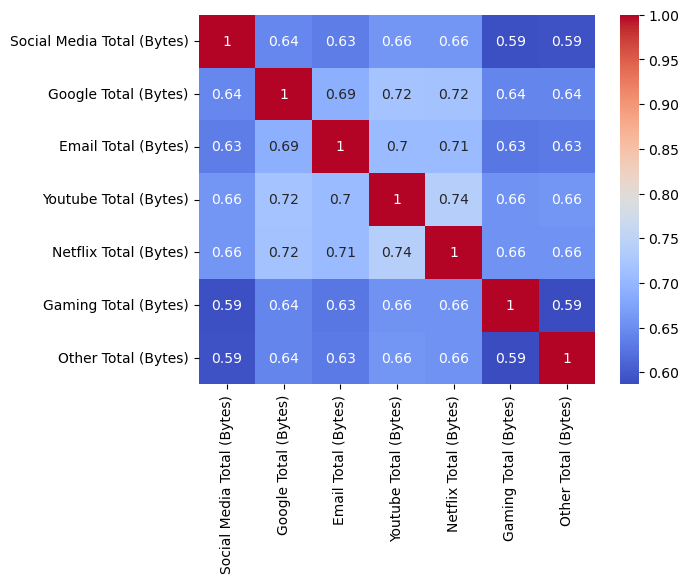

In [38]:
corr_vars = ['Social Media Total (Bytes)', 'Google Total (Bytes)', 'Email Total (Bytes)', 'Youtube Total (Bytes)', 'Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Total (Bytes)']
corr_matrix = user_behavior[corr_vars].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
app_data = user_behavior[corr_vars]
app_data_scaled = StandardScaler().fit_transform(app_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(app_data_scaled)

print(f"Explained Variance: {pca.explained_variance_ratio_}")

Explained Variance: [0.70735526 0.05912166]
